# Regression

In other vignettes we discussed the problem of fitting trajectories to observations of a univariate process in multiple patients. In many practical scenarios we also have additional information about the subject, that we might want to use for prediction. We might want to model the subject $i$ where $1 \leq i \leq N$ as

$$Y_i(t) = \mu V(t) + u_iAV(t) + X_i BV(t)+ \varepsilon(t),$$

where $V(t)$ is a functional basis, $\mu$ is an intercept vector, $u_iA$ is the individual progression, while $X_i B$ is the regression. Our task is to find $\mu,u_i,A$ and $B$. Package `fcomplete` provides an interface to fit model parameters, by optimizing the expression

$$\|Y_i(t) - \mu(t) + u_iAV(t) + X_i BV(t)\|$$

on observed points $(i,t)$.

## Preparing the bones dataset for the analysis

As in the introduction vignette, we will be using the data from the study of Bachrach et al. (1999), where they analyze spinal bone minaral density of patients. We load this data from the [*Elements of statistical learning*](https://web.stanford.edu/~hastie/ElemStatLearn/) book. This time we still group by the subject, but we color the points and lines by gender.

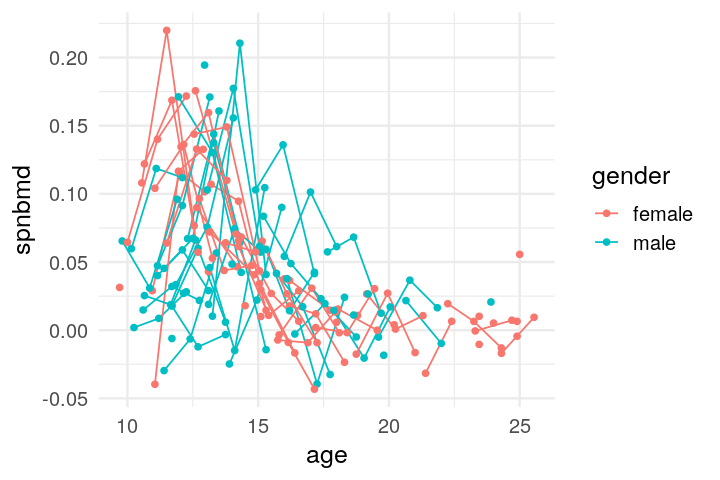

In [10]:
#devtools::install("../.")
library("fcomplete")

options(repr.plot.width=6, repr.plot.height=4)
theme_set(theme_minimal(base_size = 15)) # for presentation clarity

ggplot(aes(x = age, y = spnbmd, group = factor(idnum), color=gender), data = bone[1:200,]) +
    geom_line() + geom_point()

We can hypothesize that bone density is higher in female around the age of 11 and in male around the age of 14. We had similar findings in the [fcomplete vignette](fcomplete.html) where we were analyzing the principal components scores. In this section, we will use regression to account for these trends. To this end, we will simply add gender as a covariate.

## Fitting the model

To fit the model we will use the Soft-Longitudinal-Regression algorithm from Kidziński, Hastie (2018).

In [22]:
bone.test = bone
bone.test$gender.num = (bone.test$gender == "male")*1
#bone.test
model = fregression(spnbmd:age ~ gender.num|idnum, data = bone.test, d = 6, K = 3, lambda=c(0.1,0.2), fold=2, verbose = 0)

In [20]:
model

fcomplete fitted using the 'fimpute' method with a formula: ~spnbmd:agegender.num | idnum
  Number of fitted subjects (N):	 261
  Number of evaluation timpoints:	 51
  Maximum dimension (K):		 3
  Observed to N*K ratio:		 0.6194125
  Estimated r-squared:			 0.6468832

**THIS ONE IS UNDER CONSTRUCTION**